In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import os
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import warnings


warnings.filterwarnings("ignore")
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import tarfile
import requests
from tqdm import tqdm

# Specify the filename and dataset directory
filename = 'train-clean-100.tar.gz'
dataset_dir = 'LibriSpeech'
cache_dir = 'cache'  # Directory to store cached files
cached_file_path = os.path.join(cache_dir, filename)

# Ensure cache directory exists
os.makedirs(cache_dir, exist_ok=True)

# Check if the file exists and is not empty
if os.path.exists(cached_file_path) and os.path.getsize(cached_file_path) > 0:
    print(f'{filename} already exists and is not empty. Skipping download.')
else:
    # If the dataset directory exists, delete it
    if os.path.exists(dataset_dir):
        print(f'{dataset_dir} exists and will be deleted.')
        os.rmdir(dataset_dir)

    # Download the dataset
    url = 'http://www.openslr.org/resources/12/train-clean-100.tar.gz'
    print(f'Downloading {filename}...')
    response = requests.get(url, stream=True)
    with open(cached_file_path, 'wb') as file:
        for chunk in tqdm(response.iter_content(chunk_size=8192)):
            file.write(chunk)
    print('Download complete.')

# Extract the dataset if the directory does not already exist
if os.path.exists(dataset_dir):
    print(f'{dataset_dir} already exists. Skipping extraction.')
else:
    with tarfile.open(cached_file_path, 'r:gz') as tar:
        tar.extractall()
    print(f'{filename} extracted.')

779701it [04:33, 2851.27it/s]


Download complete.
train-clean-100.tar.gz extracted.


In [3]:
# Define the path to the README file
readme_path = '/kaggle/working/LibriSpeech/README.TXT'

# Check if the README file exists and then read it
if os.path.exists(readme_path):
    with open(readme_path, 'r') as file:
        readme_content = file.read()
    print(readme_content)
else:
    print(f'{readme_path} does not exist.')


1. General information

LibriSpeech is a corpus of read speech, based on LibriVox's public domain
audio books. Its purpose is to enable the training and testing of automatic
speech recognition(ASR) systems. 


2. Structure

The corpus is split into several parts to enable users to selectively download
subsets of it, according to their needs. The subsets with "clean" in their name
are supposedly "cleaner"(at least on average), than the rest of the audio and
US English accented. That classification was obtained using very crude automated 
means, and should not be considered completely reliable. The subsets are
disjoint, i.e. the audio of each speaker is assigned to exactly one subset.

The parts of the corpus are as follows:

* dev-clean, test-clean - development and test set containing "clean" speech.
* train-clean-100 - training set, of approximately 100 hours of "clean" speech
* train-clean-360 - training set, of approximately 360 hours of "clean" speech
* dev-other, test-other - deve

In [4]:
speaker_path = '/kaggle/working/LibriSpeech/SPEAKERS.TXT'

# Check if the Speaker file exists and then read it
if os.path.exists(speaker_path):
    with open(speaker_path, 'r') as file:
        speaker_content = file.read()
    print(speaker_content)
else:
    print(f'{speaker_path} does not exist.')

; Some pipe(|) separated metadata about all LibriVox readers, whose work was used
; in the corpus.
;
; The meaning of the fields in left-to-right order is as follows:
;
; reader_id: the ID of the reader in the LibriVox's database
; gender: 'F' for female, 'M' for male
; subset: the corpus subset to which the reader's audio is assigned
; duration: total number of minutes of speech by the reader, included in the corpus
; name: the name under which the reader is registered in LibriVox
;
;ID  |SEX| SUBSET           |MINUTES| NAME
14   | F | train-clean-360  | 25.03 | Kristin LeMoine
16   | F | train-clean-360  | 25.11 | Alys AtteWater
17   | M | train-clean-360  | 25.04 | Gord Mackenzie
19   | F | train-clean-100  | 25.19 | Kara Shallenberg
20   | F | train-other-500  | 30.07 | Gesine
22   | F | train-clean-360  | 25.14 | Michelle Crandall
23   | F | train-clean-360  | 25.23 | Anita Roy Dobbs
25   | M | train-other-500  | 30.16 | John Gonzalez
26   | M | train-clean-100  | 25.08 | Denny Sa

In [5]:
import librosa
import os

# Define the dataset path
dataset_dir = '/kaggle/working/LibriSpeech/train-clean-100'


In [6]:
# Example usage

In [7]:
# audio, sr, transcription

In [8]:
import os
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import StringLookup
import matplotlib.pyplot as plt
from glob import glob

2024-09-03 01:18:13.656072: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-03 01:18:13.656193: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-03 01:18:13.783736: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Data Collection

In [9]:
# Directory containing the dataset
data_dir = '/kaggle/working/LibriSpeech/train-clean-100'

# Collect all .flac files and corresponding transcript files
audio_files = glob(os.path.join(data_dir, '**/*.flac'), recursive=True)
transcript_files = glob(os.path.join(data_dir, '**/*.txt'), recursive=True)

In [10]:
audio_files[:2], transcript_files[:2]

(['/kaggle/working/LibriSpeech/train-clean-100/289/121665/289-121665-0028.flac',
  '/kaggle/working/LibriSpeech/train-clean-100/289/121665/289-121665-0014.flac'],
 ['/kaggle/working/LibriSpeech/train-clean-100/289/121665/289-121665.trans.txt',
  '/kaggle/working/LibriSpeech/train-clean-100/289/121652/289-121652.trans.txt'])

### load audio and transcript files

In [11]:
# Function to load an audio sample and its transcription
def load_sample(speaker_id, chapter_id, utterance_id):
    base_path = os.path.join(dataset_dir, str(speaker_id), str(chapter_id))
    audio_path = os.path.join(base_path, f'{speaker_id}-{chapter_id}-{utterance_id}.flac')
    transcription_path = os.path.join(base_path, f'{speaker_id}-{chapter_id}.trans.txt')
    
    # Load the audio file
    audio, sr = librosa.load(audio_path, sr=16000)
    
    # Load the transcription
    transcription = None
    with open(transcription_path, 'r') as f:
        for line in f:
            if line.startswith(f'{speaker_id}-{chapter_id}-{utterance_id}'):
                transcription = line.strip().split(' ', 1)[1]
                break
    
    return audio, sr, transcription

In [12]:
# /kaggle/working/LibriSpeech/train-clean-100/839/130898/839-130898-0051.flac
speaker_id = '1246'
chapter_id = '124550'
utterance_id = '0004'
audio, sr, transcription = load_sample(speaker_id, chapter_id, utterance_id)

In [13]:
def load_audio_file(audio_path, sr=16000):
    # Load the audio file
    audio, sr = librosa.load(audio_path, sr=sr)
    return audio, sr

def load_transcript_file(transcription_path):
    with open(transcription_path, 'r') as f:
        lines = f.readlines()
    transcripts = {}
    for line in lines:
        split_line = line.strip().split(' ', 1)
        if len(split_line) == 2:
            transcripts[split_line[0]] = split_line[1]
    return transcripts

In [14]:
audio, transcription, sr

(array([ 0.0055542 ,  0.00674438,  0.00247192, ..., -0.00128174,
        -0.00195312, -0.00189209], dtype=float32),
 'NOT TO HAVE TO REPORT TO KENNICOTT AT THE END OF THE DAY ALL THAT SHE HAD DONE OR MIGHT DO WAS A RELIEF WHICH MADE UP FOR THE OFFICE WEARINESS SHE FELT THAT SHE WAS NO LONGER ONE HALF OF A MARRIAGE',
 16000)

In [15]:
speaker_id, chapter_id, utterance_id

('1246', '124550', '0004')

In [16]:
ipd.Audio(audio, rate=sr)

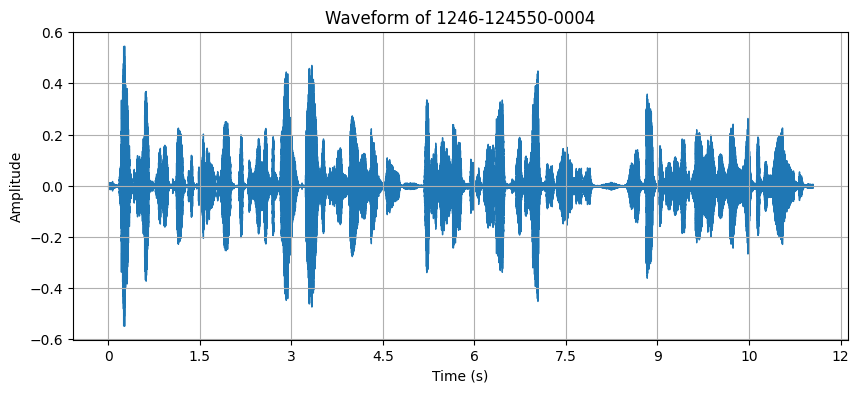

In [17]:
import matplotlib.pyplot as plt
import librosa.display

def plot_waveform(audio, sr, title="Waveform"):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio, sr=sr)
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.show()

# Example usage with the loaded audio
plot_waveform(audio, sr, title=f"Waveform of {speaker_id}-{chapter_id}-{utterance_id}")

#### Augmentation

### Resample Audio

In [18]:
def resample_audio(audio, sr, target_sr=16000):
    if sr != target_sr:
        audio = librosa.resample(audio, orig_sr=sr, target_sr=target_sr)
    return audio, target_sr

### Normalize audio

In [19]:
def normalize_audio(audio):
    # Mean normalization
    return (audio - np.mean(audio)) / np.std(audio)

In [20]:
norm_audio = normalize_audio(audio)
norm_audio

array([ 0.0848072 ,  0.10447669,  0.03386826, ..., -0.02816629,
       -0.0392619 , -0.03825321], dtype=float32)

In [21]:
ipd.Audio(audio, rate=sr)

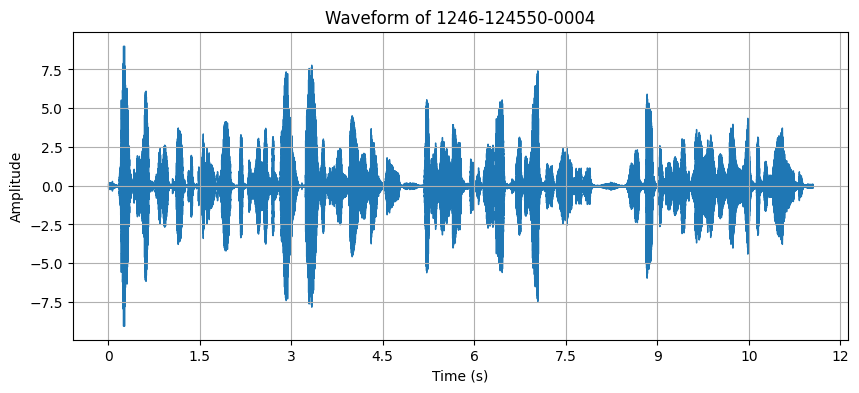

In [22]:
plot_waveform(norm_audio, sr, title=f"Waveform of {speaker_id}-{chapter_id}-{utterance_id}")


### Feature Extraction

In [23]:
# Function to extract Mel Spectrogram
def extract_mel_spectrogram(audio, sr=16000, n_mels=80):
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    return log_mel_spectrogram

In [24]:
log_mel_spectrogram = extract_mel_spectrogram(audio, sr=16000, n_mels=80)

In [25]:
log_mel_spectrogram.shape

(80, 361)

* Normalization of features

* Visualizing the MFCCs and Log-Mel Spectrogram

In [26]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [27]:
# Load the audio file (replace 'audio_path' with your actual file path)
audio_path = '/kaggle/working/LibriSpeech/train-clean-100/1246/124550/1246-124550-0004.flac'

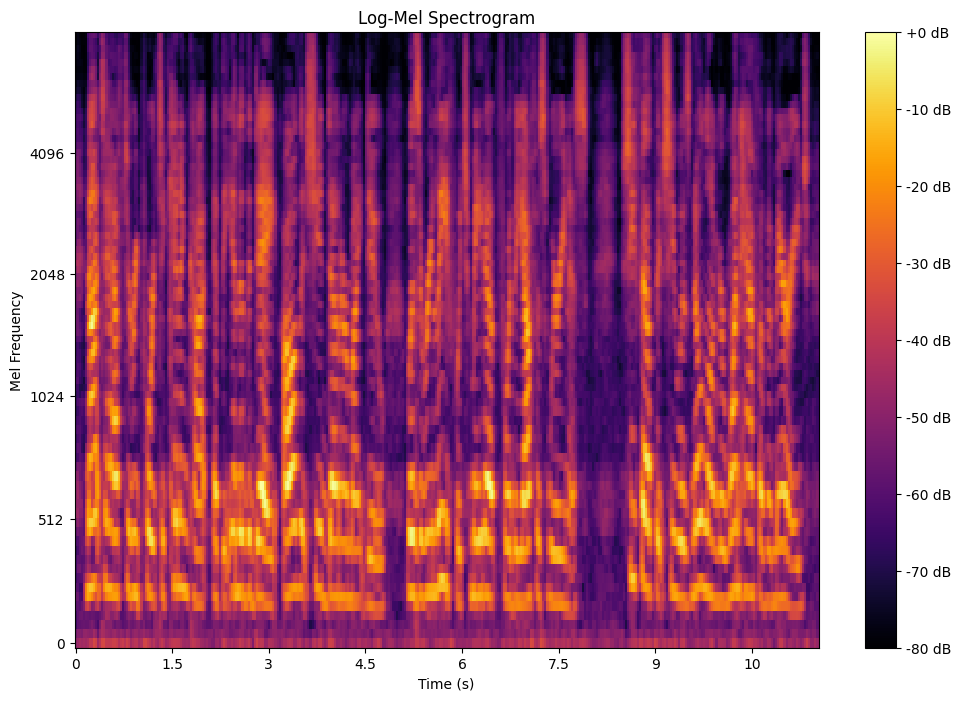

In [28]:
# Function to plot log-Mel spectrogram
def plot_log_mel_spectrogram(audio_path, sr=16000, n_mels=80):
    # Load the audio file
    audio, _ = librosa.load(audio_path, sr=sr)
    
    # Compute Mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels)
    
    # Convert Mel spectrogram to log scale (dB)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    
    # Plot the log-Mel spectrogram
    plt.figure(figsize=(12, 8))
    librosa.display.specshow(log_mel_spectrogram, sr=sr, x_axis='time', y_axis='mel', cmap='inferno')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Log-Mel Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Mel Frequency')
    plt.show()

plot_log_mel_spectrogram(audio_path)


### Augmentation

In [29]:
def apply_frequency_masking_tf(log_mel_spectrogram, num_masks=2, max_mask_size=10):
    num_mel_bins = tf.shape(log_mel_spectrogram)[0]

    # Ensure that max_mask_size is not greater than num_mel_bins
    max_mask_size = tf.minimum(max_mask_size, num_mel_bins)

    for _ in range(num_masks):
        mask_size = tf.random.uniform([], minval=1, maxval=max_mask_size+1, dtype=tf.int32)
        start = tf.random.uniform([], minval=0, maxval=num_mel_bins - mask_size + 1, dtype=tf.int32)
        mask = tf.pad(tf.zeros([mask_size]), [[start, num_mel_bins - mask_size - start]])
        mask = tf.reshape(mask, [num_mel_bins, 1])

        # Apply the mask along the frequency axis
        log_mel_spectrogram = log_mel_spectrogram * (1 - mask)

    return log_mel_spectrogram

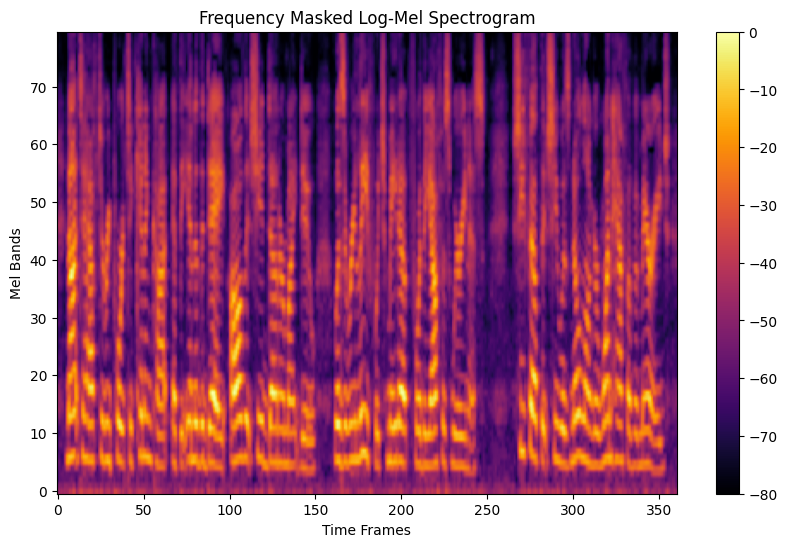

In [30]:
# Plotting the spectrogram
log_mel_spectrogram = apply_frequency_masking_tf(log_mel_spectrogram, num_masks=3, max_mask_size=10)
plt.figure(figsize=(10, 6))
plt.imshow(log_mel_spectrogram.numpy(), origin='lower', aspect='auto', cmap='inferno')
plt.colorbar()
plt.title('Frequency Masked Log-Mel Spectrogram')
plt.xlabel('Time Frames')
plt.ylabel('Mel Bands')
plt.show()

In [31]:
def apply_time_masking_tf(log_mel_spectrogram, num_masks=3, max_mask_size=150):
    num_frames = tf.shape(log_mel_spectrogram)[1]

    # Ensure that max_mask_size is not greater than num_frames
    max_mask_size = tf.minimum(max_mask_size, num_frames)

    for _ in range(num_masks):
        mask_size = tf.random.uniform([], minval=1, maxval=max_mask_size+1, dtype=tf.int32)
        start = tf.random.uniform([], minval=0, maxval=num_frames - mask_size + 1, dtype=tf.int32)
        mask = tf.pad(tf.zeros([mask_size]), [[start, num_frames - mask_size - start]])
        mask = tf.reshape(mask, [num_frames])

        # Apply the mask along the time axis
        log_mel_spectrogram = log_mel_spectrogram * tf.expand_dims(1 - mask, axis=0)

    return log_mel_spectrogram

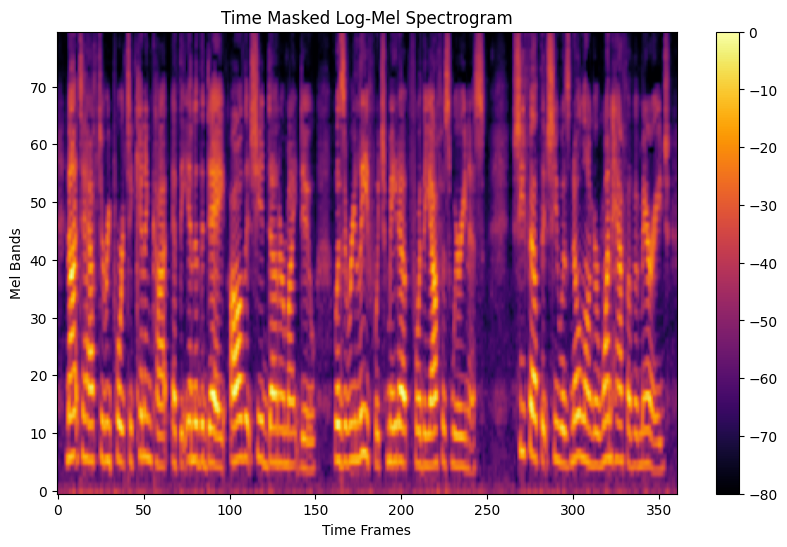

In [32]:
# Plotting the spectrogram
log_mel_spectrogram = apply_time_masking_tf(log_mel_spectrogram, num_masks=3, max_mask_size=150)
plt.figure(figsize=(10, 6))
plt.imshow(log_mel_spectrogram.numpy(), origin='lower', aspect='auto', cmap='inferno')
plt.colorbar()
plt.title('Time Masked Log-Mel Spectrogram')
plt.xlabel('Time Frames')
plt.ylabel('Mel Bands')
plt.show()

In [33]:
log_mel_spectrogram.shape

TensorShape([80, 361])

### Normalization

In [34]:
import tensorflow as tf
import math

In [35]:
# # Function to normalize features
# def normalize_features(features):
#     mean = tf.math.reduce_mean(features, axis=1, keepdims=True)
#     std = tf.math.reduce_std(features, axis=1, keepdims=True)
#     normalized_features = (features - mean) / (std + 1e-10)
#     return normalized_features


In [36]:
def normalize_features(features):
    # Check if input is 3D
    if features.ndim == 3:
        # Normalize each spectrogram in the batch independently
        mean = tf.math.reduce_mean(features, axis=2, keepdims=True)
        std = tf.math.reduce_std(features, axis=2, keepdims=True)
        normalized_features = (features - mean) / (std + 1e-10)
    elif features.ndim == 2:
        # Normalize a single spectrogram
        mean = tf.math.reduce_mean(features, axis=1, keepdims=True)
        std = tf.math.reduce_std(features, axis=1, keepdims=True)
        normalized_features = (features - mean) / (std + 1e-10)
    else:
        raise ValueError("Input features must be 2D or 3D tensor.")

    return normalized_features

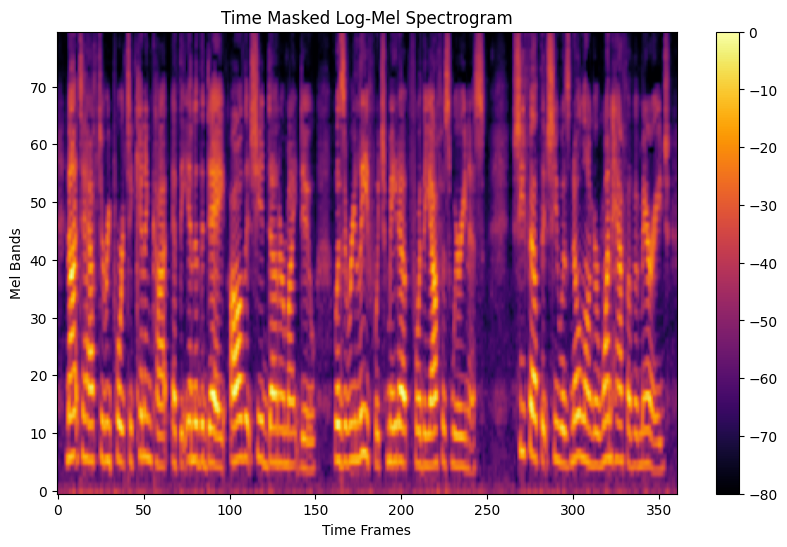

In [37]:
# Plotting the spectrogram
log_mel_spectrogram = apply_time_masking_tf(log_mel_spectrogram, num_masks=3, max_mask_size=150)
plt.figure(figsize=(10, 6))
plt.imshow(log_mel_spectrogram.numpy(), origin='lower', aspect='auto', cmap='inferno')
plt.colorbar()
plt.title('Time Masked Log-Mel Spectrogram')
plt.xlabel('Time Frames')
plt.ylabel('Mel Bands')
plt.show()

#### Visualize Normalized Log-Mel Spectrogram

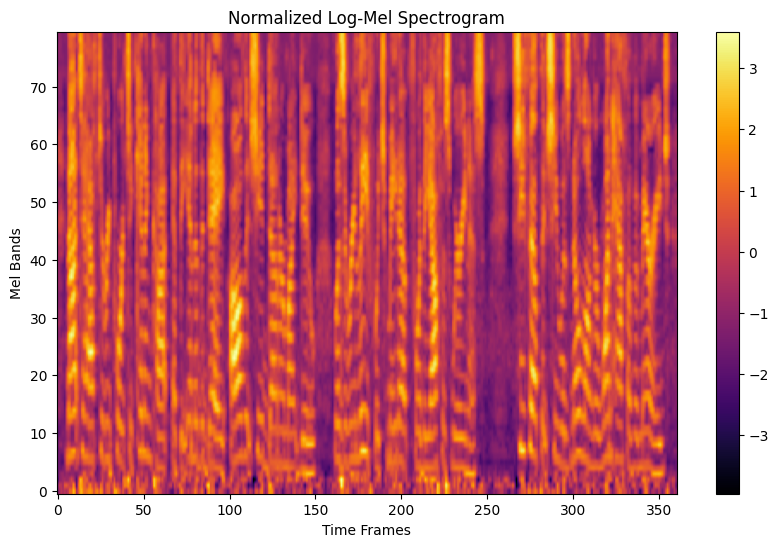

In [38]:
# Plotting the spectrogram
log_mel_spectrogram = normalize_features(log_mel_spectrogram)
plt.figure(figsize=(10, 6))
plt.imshow(log_mel_spectrogram.numpy(), origin='lower', aspect='auto', cmap='inferno')
plt.colorbar()
plt.title('Normalized Log-Mel Spectrogram')
plt.xlabel('Time Frames')
plt.ylabel('Mel Bands')
plt.show()

### Text Preprocessing

In [39]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([c for c in text if c.isalpha() or c == ' '])
    # Tokenization (character level)
    characters = [x for x in text]
    return characters

### Mapping Character to integer and vice versa

In [40]:
char_map_str = 'abcdefghijklmnopqrstuvwxyz '
characters = [x for x in char_map_str]

# Mapping strings to integers
char_to_num = StringLookup(vocabulary=characters, oov_token='')

# Mapping integers to strings
num_to_char = StringLookup(vocabulary=char_to_num.get_vocabulary(), oov_token='', invert=True)

In [41]:
print(f'Characters: {char_to_num.get_vocabulary()}')
print(f'Size: {char_to_num.vocabulary_size()}')

Characters: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ']
Size: 28


### Process All audio and transcript files

In [42]:
from tqdm import tqdm

In [43]:
n_mels = 80
sr = 16000
processed_features = []
processed_transcripts = []

for audio_file in tqdm(audio_files, desc="Precessing Files at..."):
    # Load audio
    audio, sr = load_audio_file(audio_file)
    
    # Resample audio if necessary
    audio, sr = resample_audio(audio, sr)
    
    # Normalize audio
    audio = normalize_audio(audio)
    
      # Extract features
    log_mel_spectrogram = extract_mel_spectrogram(audio, sr=16000, n_mels=80)

    log_mel_spectrogram = apply_frequency_masking_tf(log_mel_spectrogram, num_masks=3, max_mask_size=10)
    log_mel_spectrogram = apply_time_masking_tf(log_mel_spectrogram, num_masks=3, max_mask_size=150)
    log_mel_spectrogram = normalize_features(log_mel_spectrogram)
    
    # Extract transcript ID
    base_name = os.path.basename(audio_file).split('.')[0]
    speaker_id = base_name.split('-')[0]
    chapter_id = base_name.split('-')[1]
    transcript_path = os.path.join(data_dir, speaker_id, chapter_id, f'{speaker_id}-{chapter_id}.trans.txt')
    
    # Load and preprocess transcript
    transcripts = load_transcript_file(transcript_path)
    transcript = transcripts.get(base_name, '')
    processed_text = preprocess_text(transcript)
    
    # convert the labels to lower
    processed_text = tf.strings.lower(processed_text)
    
    # Convert text to integer labels
    label = char_to_num(tf.strings.unicode_split(processed_text, input_encoding='UTF-8'))
#     label = tf.keras.preprocessing.sequence.pad_sequences(label,padding='post',dtype='int32')
#     log_mel_spectrogram = tf.keras.preprocessing.sequence.pad_sequences(log_mel_spectrogram,padding='post',dtype='float32')
    
  

    processed_features.append(log_mel_spectrogram)
    processed_transcripts.append(label)

Precessing Files at...: 100%|██████████| 28539/28539 [34:53<00:00, 13.63it/s]


In [44]:
len(processed_features), len(processed_transcripts)

(28539, 28539)

In [45]:
[(w.shape) for w in processed_transcripts[:10]]

[TensorShape([165, None]),
 TensorShape([178, None]),
 TensorShape([233, None]),
 TensorShape([197, None]),
 TensorShape([219, None]),
 TensorShape([252, None]),
 TensorShape([212, None]),
 TensorShape([244, None]),
 TensorShape([242, None]),
 TensorShape([241, None])]

In [46]:
processed_features[:2]

[<tf.Tensor: shape=(80, 342), dtype=float32, numpy=
 array([[ 0.9321338 ,  0.8661816 ,  0.6943832 , ..., -0.9590377 ,
         -0.7825251 , -1.3853567 ],
        [ 0.8027965 ,  0.26601073, -1.3630948 , ..., -0.93039346,
         -1.2392708 , -1.2374376 ],
        [ 0.4441258 , -0.02784566, -1.9983866 , ..., -2.4545631 ,
         -2.1195288 , -1.4255139 ],
        ...,
        [-0.4533604 , -0.7288166 , -0.7288166 , ..., -0.7288166 ,
         -0.7288166 , -0.7288166 ],
        [-0.48000365, -0.76053905, -0.76053905, ..., -0.76053905,
         -0.76053905, -0.76053905],
        [-0.45012334, -0.72908014, -0.72908014, ..., -0.72908014,
         -0.72908014, -0.72908014]], dtype=float32)>,
 <tf.Tensor: shape=(80, 456), dtype=float32, numpy=
 array([[-1.3974276 , -0.82808506, -0.56324947, ...,  0.04820089,
         -0.2870726 , -1.4062632 ],
        [-0.55640936, -0.45225063, -0.58771396, ..., -0.70723915,
         -0.9578194 , -0.6207971 ],
        [-0.613434  , -0.9733098 , -1.1723089 , .

### Findng the max length of the spectrograms to pad.

In [47]:
# Find the maximum time dimension
max_time_dim = max([tf.shape(spectrogram)[1] for spectrogram in processed_features])

In [48]:
max_time_dim

<tf.Tensor: shape=(), dtype=int32, numpy=767>

#### Padding the features

In [49]:
# Pad the spectrograms to have the same time dimension
padded_features = [tf.pad(spectrogram, paddings=[[0, 0], [0, max_time_dim - tf.shape(spectrogram)[1]]]) for spectrogram in processed_features]


* checking shape of the padded spectrograms

In [50]:
[(x.shape) for x in padded_features[:10]]

[TensorShape([80, 767]),
 TensorShape([80, 767]),
 TensorShape([80, 767]),
 TensorShape([80, 767]),
 TensorShape([80, 767]),
 TensorShape([80, 767]),
 TensorShape([80, 767]),
 TensorShape([80, 767]),
 TensorShape([80, 767]),
 TensorShape([80, 767])]

In [51]:
# padded_transcripts = [transcript.to_tensor(default_value=-1) for transcript in processed_transcripts]

In [52]:
padded_transcripts = tf.keras.preprocessing.sequence.pad_sequences(
    [tf.squeeze(transcript, axis=-1) for transcript in processed_transcripts],
    padding='post',  # Pad at the end of the sequence
    value=0  # Use 0 for padding (or another special value)
)

In [53]:
[(y.shape) for y in padded_transcripts[:10]]

[(398,),
 (398,),
 (398,),
 (398,),
 (398,),
 (398,),
 (398,),
 (398,),
 (398,),
 (398,)]

In [54]:
# Define directories for saving data
processed_data_dir = '/kaggle/working/processed_data'
padded_data_dir = '/kaggle/working/padded_data'

# Create directories if they do not exist
os.makedirs(processed_data_dir, exist_ok=True)
os.makedirs(padded_data_dir, exist_ok=True)

In [55]:
os.listdir()

['padded_data', 'LibriSpeech', 'processed_data', 'cache', '__notebook__.ipynb']

In [56]:
# Save padded features and transcripts
np.save(os.path.join(padded_data_dir, 'padded_features.npy'), padded_features)
np.save(os.path.join(padded_data_dir, 'padded_transcripts.npy'), padded_transcripts)

In [57]:
import pickle

In [58]:
# Load the padded features and transcripts
padded_features = np.load(os.path.join(padded_data_dir, 'padded_features.npy'), allow_pickle=True)
padded_transcripts = np.load(os.path.join(padded_data_dir, 'padded_transcripts.npy'), allow_pickle=True)

### creating Tensorflow dataset

In [59]:
# Convert the padded features and transcripts to a TensorFlow Dataset
def generator():
    for feature, transcript in zip(padded_features, padded_transcripts):
        yield feature, transcript

In [60]:
# Create the dataset
dataset = tf.data.Dataset.from_generator(generator, 
                                         output_signature=(
                                             tf.TensorSpec(shape=(80, None), dtype=tf.float32),
                                             tf.TensorSpec(shape=(None,), dtype=tf.int32)
                                         ))

In [61]:
# Shuffle and batch the dataset
batch_size = 32  # Adjust as needed
dataset = dataset.cache().shuffle(buffer_size=len(padded_features)).batch(batch_size)

# Optional: Prefetch to improve performance
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [62]:
dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 80, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, None), dtype=tf.int32, name=None))>

In [63]:
# Example: Iterating through the dataset
for batch_features, batch_transcripts in dataset.take(1):
    print(batch_features.shape[:5], batch_transcripts.shape[:5])

(32, 80, 767) (32, 398)


### Splitting Dataset into train and validation sets

In [64]:
dataset_size = len(list(dataset))

In [65]:
dataset_size


# total_samples = len(dataset)  # Number of samples in the dataset

# # Calculate the number of batches
# total_batches = total_samples // batch_size
# if total_samples % batch_size != 0:
#     total_batches += 1  

# print("Total number of batches:", total_batches)

892

In [66]:
train_size = 0.8
val_size = 0.2
# Calculate the number of examples for each split
train_batches = int(dataset_size * train_size)
val_batches = dataset_size - train_size

In [67]:
# Create training and validation datasets
train_dataset = dataset.take(train_batches)
val_dataset = dataset.skip(train_batches)

# Prefetch to improve performance
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [68]:
#  Checking dataset shapes
for batch_features, batch_transcripts in train_dataset.take(1):
    print("Train batch features shape:", batch_features.shape)
    print("Train batch transcripts shape:", batch_transcripts.shape)

Train batch features shape: (32, 80, 767)
Train batch transcripts shape: (32, 398)


In [69]:
for batch_features, batch_transcripts in val_dataset.take(1):
    print("Validation batch features shape:", batch_features.shape)
    print("Validation batch transcripts shape:", batch_transcripts.shape)

Validation batch features shape: (32, 80, 767)
Validation batch transcripts shape: (32, 398)


## Modelling